In [9]:
suppressMessages(library(limma))
suppressMessages(library(jsonlite))
suppressMessages(library(progress))
suppressMessages(library(gplots))
suppressMessages(library(dplyr))
suppressMessages(library(metafor))
suppressMessages(library(ggplot2))
suppressMessages(library(org.Mm.eg.db))
suppressMessages(library(annotate))
suppressMessages(library(mygene))
suppressMessages(require("biomaRt"))
#suppressMessages(library(gCMAP))
suppressMessages(library('qusage'))
#suppressMessages(library(TMixClust))


### FUNCTIONS
source("./post_functions/FUN.Run_functional_GSEA.R")
source("./utils_functions/gather.R")
source("./utils_functions/mouse2human.R")
source("./utils_functions/varplot.R")
source("./utils_functions/get_slopes.R")
source("./plot_functions/corplot.R")
source("./plot_functions/FUN.Visualize_GSEA_heatmap.R")
source("./plot_functions/ggcorplot.R")
source("./plot_functions/plot_dynamics.R")
source("./plot_functions/plot_volcano.R")
source("./plot_functions/plot_venn.R")
source('plot_functions/gene_barplot.R')
source('plot_functions/plot_contingency.R')
source('plot_functions/plot_contingency_pair.R')

#OPTIONS
options(warn=-1) #no warnings -1; yes warnings 0

# Panel 1

In [2]:
# show how signature correlates with datasets

### get all needed data
signature_mouse <- read.csv('reprogramming_mouse_full.csv', row.names=1)
signature_human <- read.csv('reprogramming_human_full.csv', row.names=1)
signature_humanEtz <- read.csv('reprogramming_human_full_humanEntrez.csv', row.names=1)
signature_mouse_human <- read.csv('reprogramming_human_mouse_full.csv', row.names=1)

datasets <- c('GSE67462$OSKM','GSE38509$OSKM','GSE38509$OSK',
              'GSE116309$OKMS', 'GSE116309$OK+9MS', 'GSE46321$C/EBPα+ OSKM', 
              'GSE114581$OSKM+dox_mef', 'GSE21757$OKMS',
              'GSE127927$7F-Esrrb', 'GSE127927$7F-Glis1', 'GSE127927$7F-Jdp2', 
              'GSE127927$7F-Kdm2b', 'GSE127927$7F-Mkk6', 'GSE127927$7F-Nanog', 
              'GSE127927$7F-Sall4', 'GSE127927$7F', 
              'GSE102348$OSKM$Gatad2a-/-', 'GSE102348$OSKM$Mbd3f/-', 'GSE102348$OSKM$WT-1')

# datasets <- c('GSE89455$OSKM$HDF', 'GSE89455$OSKM$HAdMSC', 'GSE89455$OSKM$HA', 
#              'GSE89455$OSKM$HBEC','GSE89455$OSKM$HPrEC','GSE50206$OSKM$HDF',
#              'GSE50206$OSKM$ASC','GSE50206$OSKM$HA','GSE50206$OSKM$NHBE',
#              'GSE50206$OSKM$PrEC','GSE54848$OSKM$HDF')

ultradf <- fromJSON("./data/ultradf_v4.json")
#ultradf <- fromJSON("./data/ultradf_human_v3.json") #ultradf_human is always with human EntrezID

#parsing
for (i in names(ultradf)) {
    df <- read.csv(text=ultradf[[i]]$data, row.names=2)[, -1]
    pheno <- read.csv(text=ultradf[[i]]$pheno)
    stopifnot(nrow(pheno)==ncol(df))
    ultradf[[i]]$data <- df
    ultradf[[i]]$pheno <- pheno
}
ultradf <- ultradf[datasets]

tmp_result <- get_slopes(ultradf, stoplist=c(), genelist=c())
datasets_list <- tmp_result[['datasets']]
slopes <- tmp_result[['slopes']]


combined <- c(list("Reprogramming:Mouse"=signature_mouse), datasets_list)
#combined <- c(list("Reprogramming:Human"=signature_humanEtz), datasets_list)

GSE67462$OSKM Pheno: 16 Total: 20479 Passed: 5469 
GSE38509$OSKM Pheno: 18 Total: 20955 Passed: 5255 
GSE38509$OSK Pheno: 6 Total: 20955 Passed: 1050 
GSE116309$OKMS Pheno: 4 Total: 20955 Passed: 0 
GSE116309$OK+9MS Pheno: 4 Total: 20955 Passed: 1253 
GSE46321$C/EBPα+ OSKM Pheno: 18 Total: 22036 Passed: 10185 
GSE114581$OSKM+dox_mef Pheno: 9 Total: 13063 Passed: 3108 
GSE21757$OKMS Pheno: 7 Total: 16480 Passed: 1815 
GSE127927$7F-Esrrb Pheno: 5 Total: 12080 Passed: 541 
GSE127927$7F-Glis1 Pheno: 5 Total: 12080 Passed: 46 
GSE127927$7F-Jdp2 Pheno: 5 Total: 12080 Passed: 19 
GSE127927$7F-Kdm2b Pheno: 5 Total: 12080 Passed: 359 
GSE127927$7F-Mkk6 Pheno: 5 Total: 12080 Passed: 0 
GSE127927$7F-Nanog Pheno: 5 Total: 12080 Passed: 0 
GSE127927$7F-Sall4 Pheno: 5 Total: 12080 Passed: 0 
GSE127927$7F Pheno: 10 Total: 12080 Passed: 3286 
GSE102348$OSKM$Gatad2a-/- Pheno: 9 Total: 11132 Passed: 3346 
GSE102348$OSKM$Mbd3f/- Pheno: 9 Total: 11132 Passed: 2738 
GSE102348$OSKM$WT-1 Pheno: 5 Total: 1113

Using rowname as id variables

Using rowname as id variables



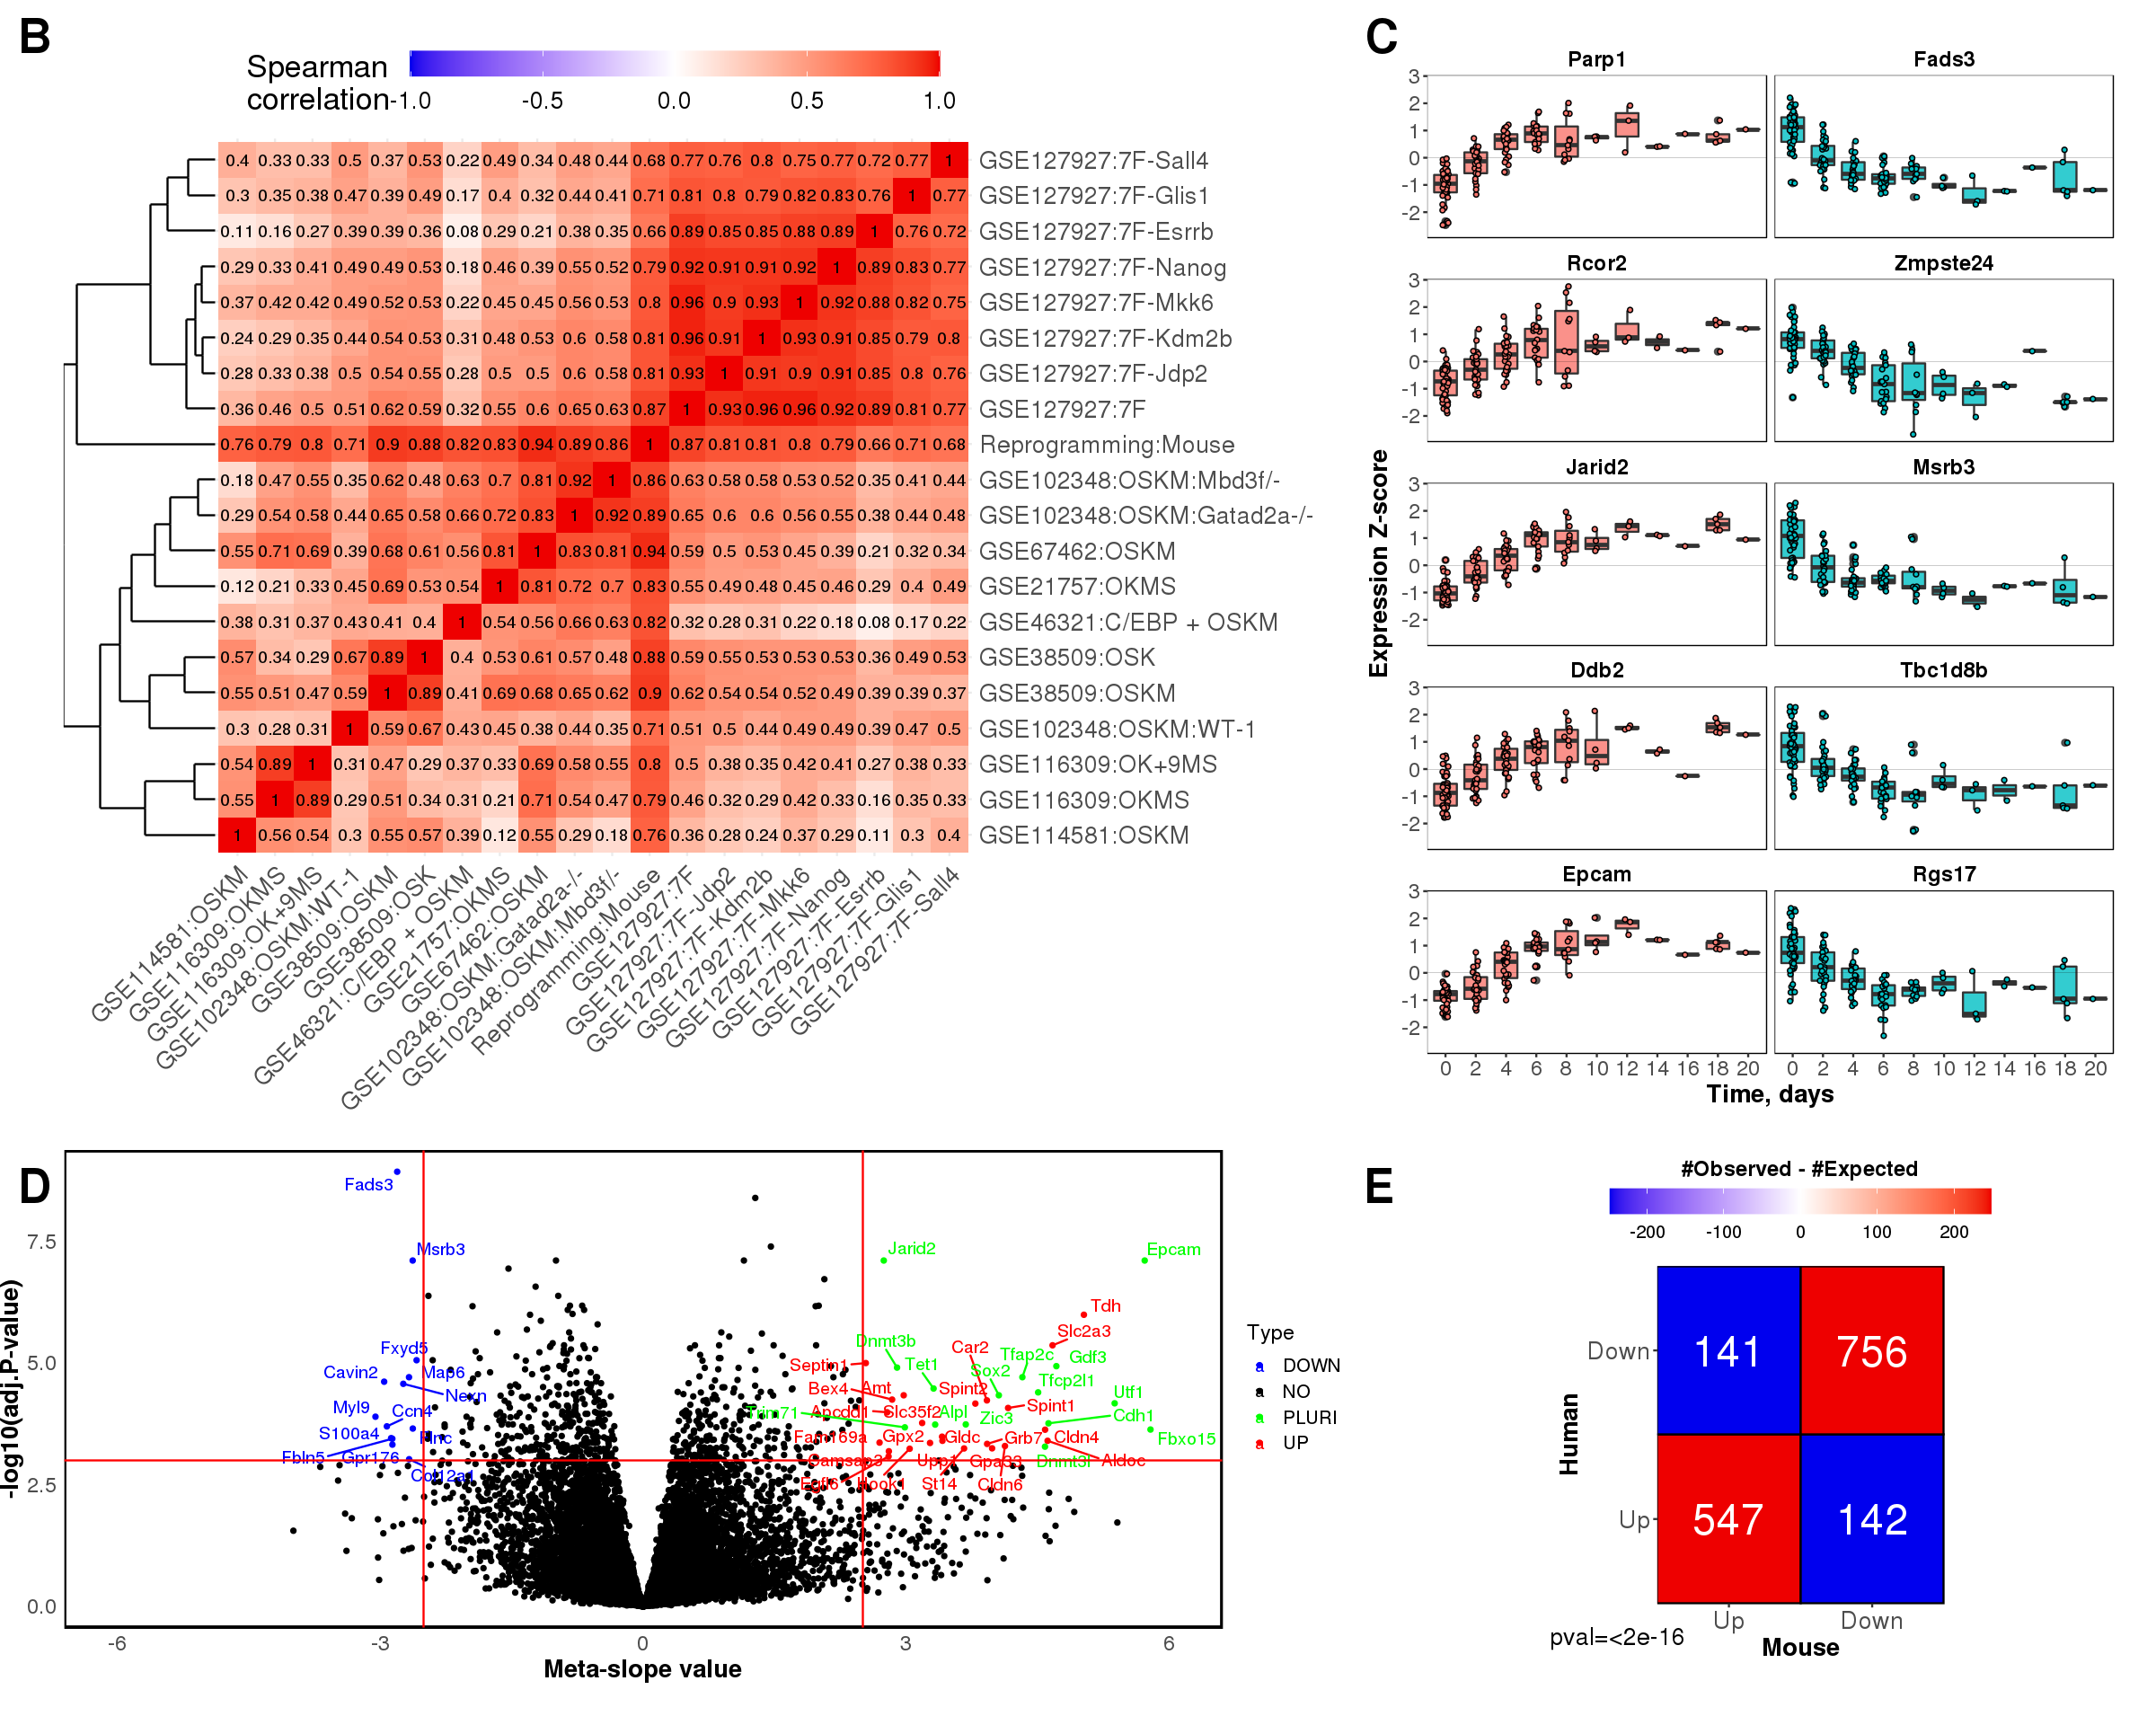

In [9]:
#library(patchwork) #p1 + p2
options(repr.plot.width = 20, repr.plot.height = 16)
#par(mar=c(7,4,4,3)+0.1)
gA <- ggheatmap(combined, 
                type='pairwise_top', method='spearman', top=350, pvplot=F,
                label_size=1.2, value_size=0.8, title="Spearman correlation",
                measure="logFC", criterion="FDR",
                orderCol = T, orderRow = T, dendroLineSize = 0.5,
                fontSize = 20,  scaleName = "value",
                distMethod = "euclidean", clustMethod = "complete")

gB <- plot_dynamics(signature_mouse, ultradf, top=5, interval=2)
#gB <- plot_dynamics(signature_humanEtz, ultradf, top=5, interval=2)

# taken from kit standard of 
#https://www.clinisciences.com/en/read/stem-cells-characterization-1087/esc-and-ipsc-characterization-by-1429.html
#and https://www.nature.com/articles/s41598-018-24051-5

pluripotency_mouse <- c('20674', '18999', '71950', '26380', '18613', '81879', '11614', 
                        '22773', '52463', '14562', '22286', '54427', '13436', '17075',
                        '16468', '21420', '50764', '12550', '11647', '636931') #mouse Etz
pluripotency_human <- c('5460') #human Etz

gC <- plot_volcano(signature_mouse, pluripotency=pluripotency_mouse, fdr_thr=0.001, coef_thr=2.5,)
# gC <- plot_volcano(signature_humanEtz, pluripotency=pluripotency_human, fdr_thr=0.01, coef_thr=4.0,
#                     xlim=c(-7,7))

#gD <- plot_volcano(signature_mouse_human, pluripotency_mouse, fdr_thr=0.0001, coef_thr=3.0)
# gD <- plot_venn(signature_mouse, signature_human)
gD <- plot_contingency_pair(signature_mouse, signature_human, suf1='Mouse', suf2='Human')

uprow <- cowplot::plot_grid(gA, gC, ncol=1, labels = c("B", "D"), label_size = 32, rel_heights = c(3, 1.5))
dwrow <- cowplot::plot_grid(gB, gD, ncol=1, labels = c("C", "E"), label_size = 32, rel_heights = c(3, 1.5))
cowplot::plot_grid(uprow, dwrow, nrow=1, label_size = 32, rel_widths = c(3, 1.8))

In [88]:
#explore venn diagram data
SM <- signature_mouse
SH <- signature_human
upm <- rownames(SM[(SM$FDR < 0.05) & (SM$logFC > 0.),])
uph <- rownames(SH[(SH$FDR < 0.05) & (SH$logFC > 0.),])
dwm <- rownames(SM[(SM$FDR < 0.05) & (SM$logFC < 0.),])
dwh <- rownames(SH[(SH$FDR < 0.05) & (SH$logFC < 0.),])

library("ggvenn")

list_up <- list(Mouse = upm,
                Human = uph)
list_dw <- list(Mouse = dwm,
                Human = dwh)

#intsec <- intersect(list_up[["Mouse"]], list_up[["Human"]])
intsec <- intersect(list_dw[["Mouse"]], list_dw[["Human"]])

SMF <- signature_mouse[intsec,]
SHF <- signature_human[intsec,]

SF <- merge(SMF, SHF, by=0)

# Panel 2

In [7]:
# show how signature correlates with datasets

### get all needed data
signature_mouse <- read.csv('reprogramming_mouse_full.csv', row.names=1)
signature_human <- read.csv('reprogramming_human_full.csv', row.names=1)
signature_humanEtz <- read.csv('reprogramming_human_full_humanEntrez.csv', row.names=1)
signature_mouse_human <- read.csv('reprogramming_human_mouse_full.csv', row.names=1)

combined_full_rep <- readRDS('combined_full_rep.rds')

Using rowname as id variables

Using rowname as id variables



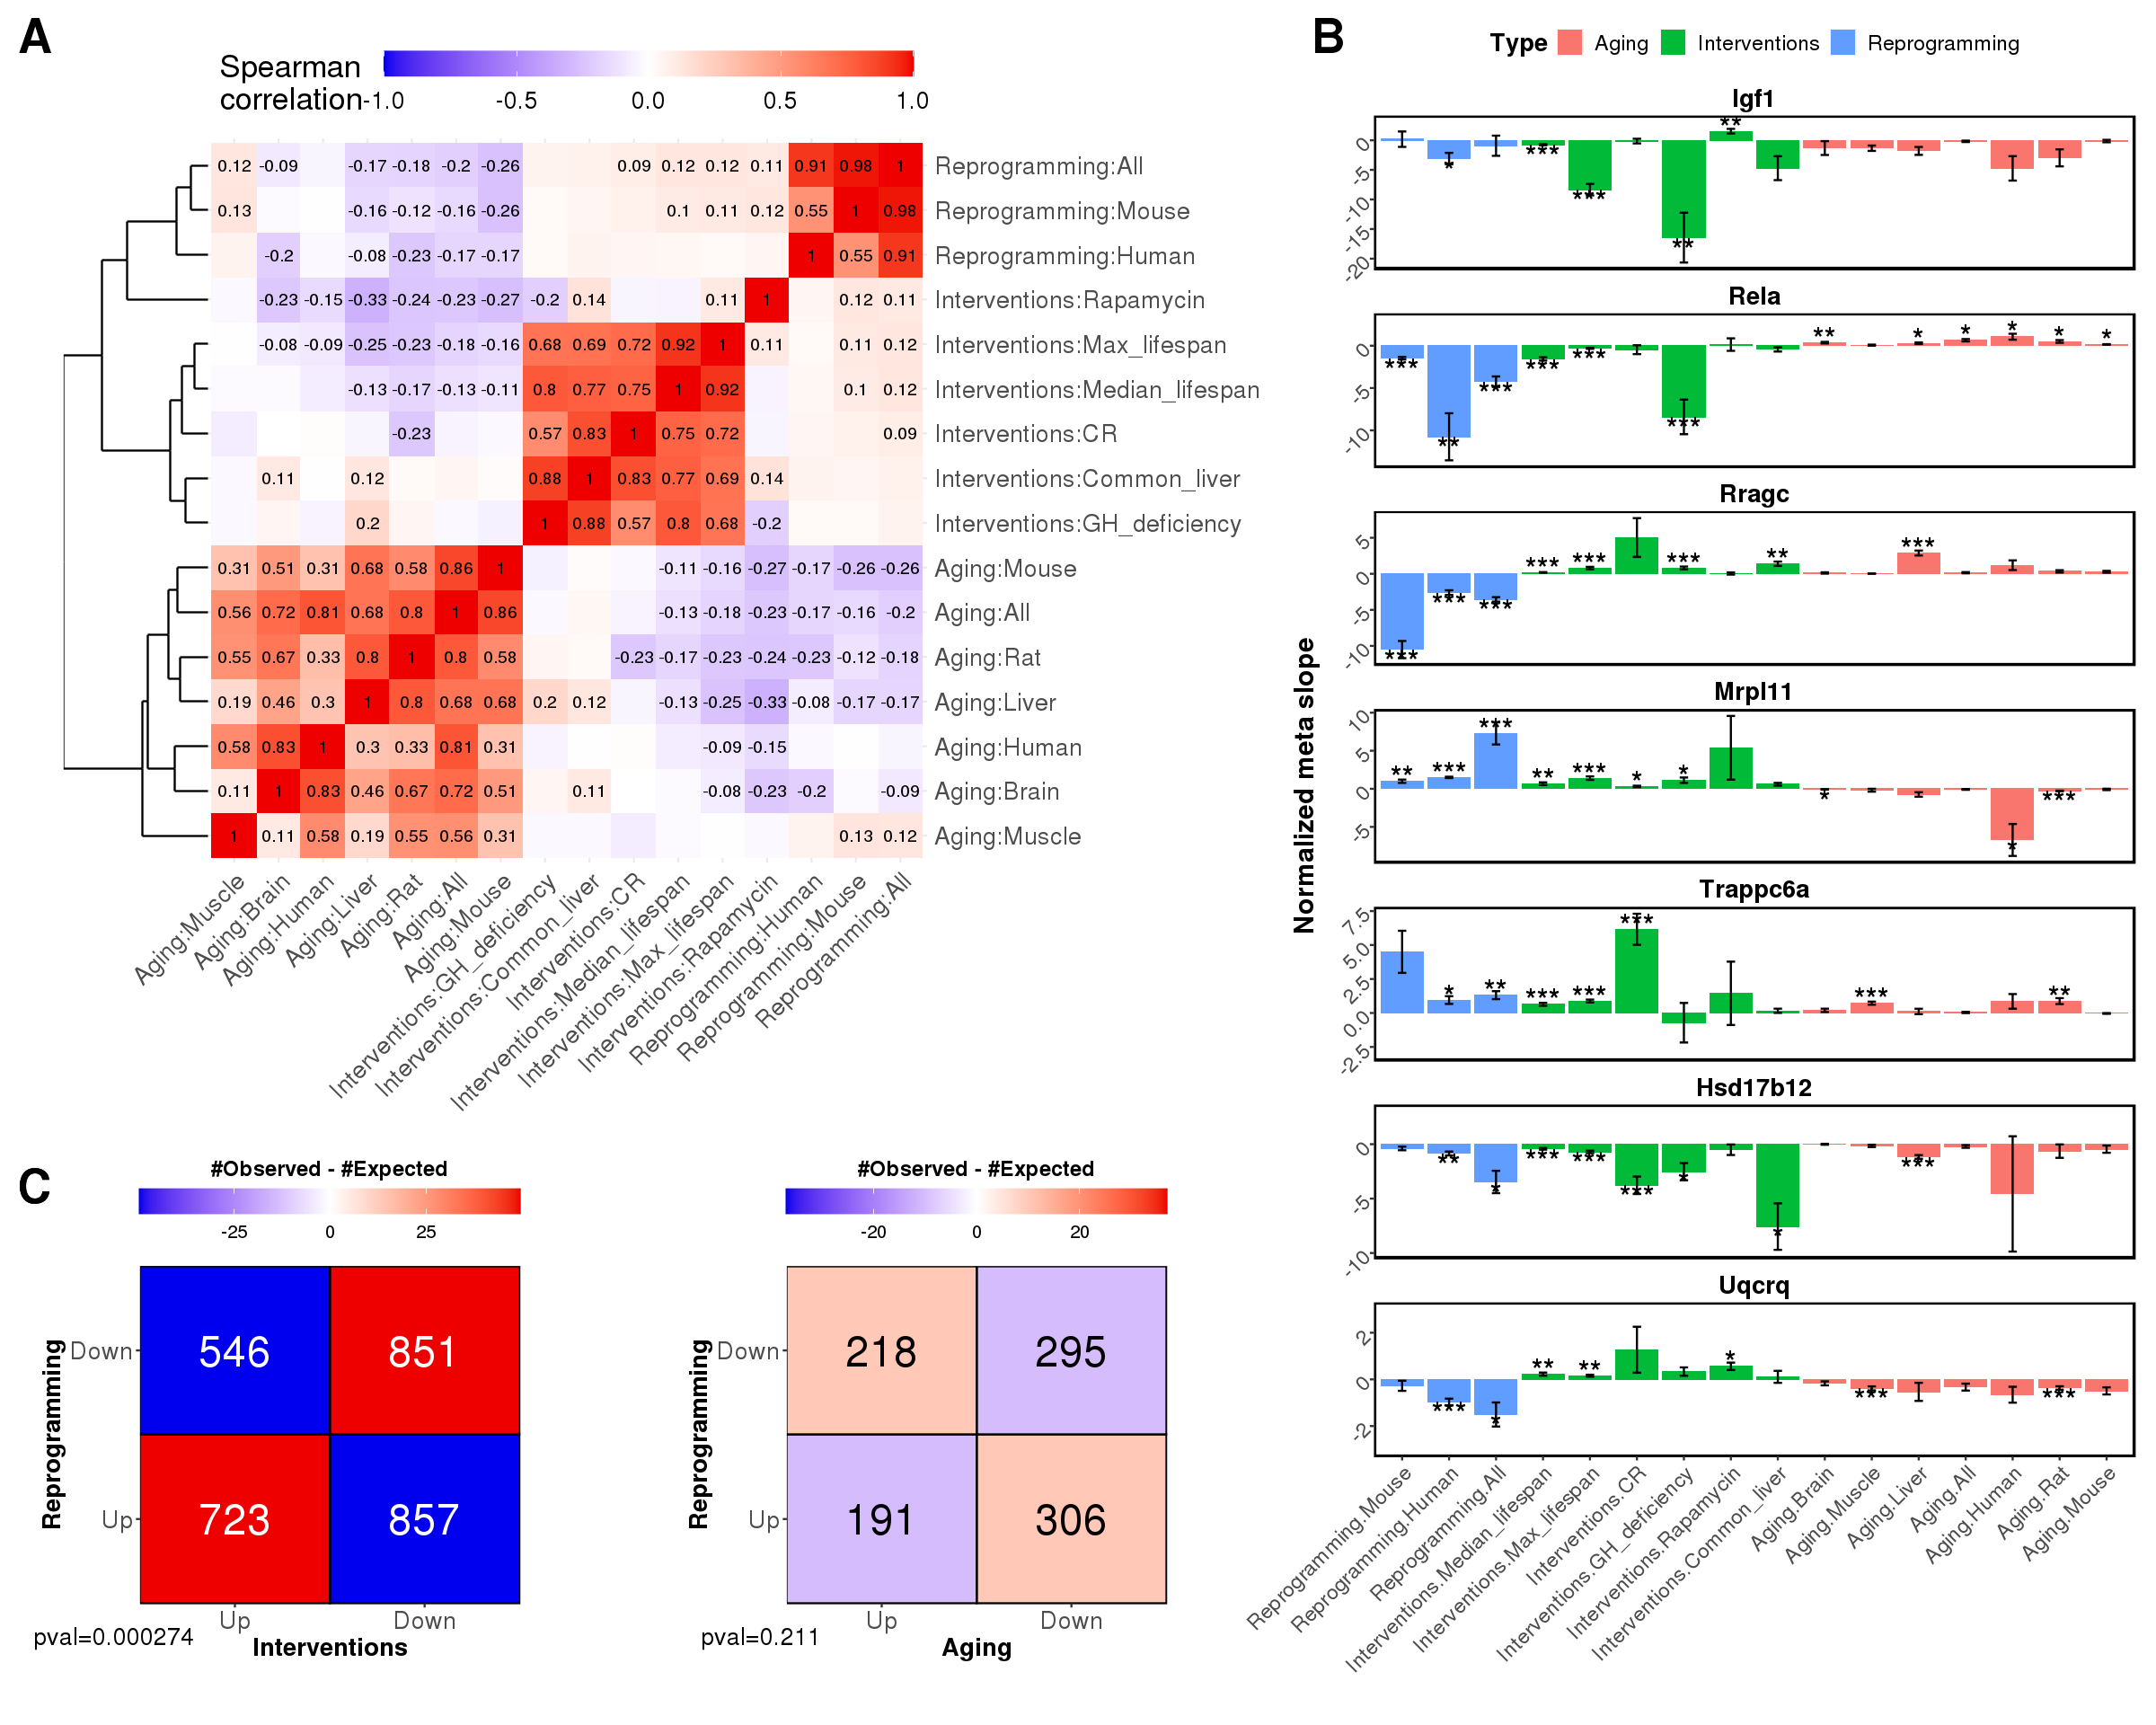

In [23]:
options(repr.plot.width = 20, repr.plot.height = 16)
source('plot_functions/gene_barplot.R')
#options(repr.plot.width = 12, repr.plot.height = 12)
#par(mar=c(7,4,4,3)+0.1)
gA <- ggheatmap(combined_full_rep, 
                type='pairwise_top', method='spearman', top=350, pvplot=F,
                label_size=1.2, value_size=0.8, title="Spearman correlation",
                measure="logFC", criterion="FDR",
                orderCol = T, orderRow = T, dendroLineSize = 0.5,
                fontSize = 20,  scaleName = "value",
                distMethod = "euclidean", clustMethod = "complete")

gene_interest <- c('Igf1', 'Rela', 'Rragc', 'Mrpl11', 'Trappc6a', 'Hsd17b12', 'Uqcrq')
#gene_interest <- c('Mmp9', 'Gadd45a', 'Itpr3', 'Bmp2', 'Igfbp3', 'Sesn2', 'Ptges', 'Fos')
gB <- gene_barplot(combined_full_rep, gene_interest)


gC1 <- plot_contingency(combined_full_rep, 'Interventions', lims=c())
gC2 <- plot_contingency(combined_full_rep, 'Aging', lims=c(-37, 37), textcol='black')

gC <- cowplot::plot_grid(gC1, gC2, labels=c('C', ''), ncol=2, nrow=1, 
                            label_size = 32, rel_heights = c(2, 2))

left <- cowplot::plot_grid(gA, gC, labels=c('A', 'C'), ncol=1, nrow=2, 
                            label_size = 32, rel_heights = c(4, 2))
cowplot::plot_grid(left, gB, labels=c('', 'B'), ncol=2, nrow=1, 
                            label_size = 32, rel_widths = c(3, 2))

In [13]:
X <- signature_mouse
Y <- signature_human
X <- X[X$FDR < 0.05,]
Y <- Y[Y$FDR < 0.05,]

sub <- merge(X, Y, by=0)
col1 <- "logFC.x"
col2 <- "logFC.y"
urua <- length(sub[(sub[[col1]] > 0) & (sub[[col2]] > 0),]$Row.names)
urda <- length(sub[(sub[[col1]] < 0) & (sub[[col2]] > 0),]$Row.names)
drua <- length(sub[(sub[[col1]] > 0) & (sub[[col2]] < 0),]$Row.names)
drda <- length(sub[(sub[[col1]] < 0) & (sub[[col2]] < 0),]$Row.names)

if (all(c(urua, urda, drua, drda)) == T){
    #test for distribution randomness
    cont_table <- cbind(c(urua, drua), 
                        c(urda, drda))
    test <- chisq.test(cont_table)
    pval <- test$p.val
}

data <- as.matrix(test$observed)
data

547,141
142,756


# Panel 3

In [61]:
gsea <-readRDS("fgsea_results_All.rds")
#make all pathways as indices
for (name in names(gsea)){
    gsea[[name]] <- as.data.frame(gsea[[name]])
    rownames(gsea[[name]]) <- gsea[[name]]$pathway
}

clockm = read.csv('clocks/Mouse_clock_output.csv', row.names=1)
clockh = read.csv('clocks/Human_clock_output.csv', row.names=1)

Using rowname as id variables

Using rowname as id variables

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



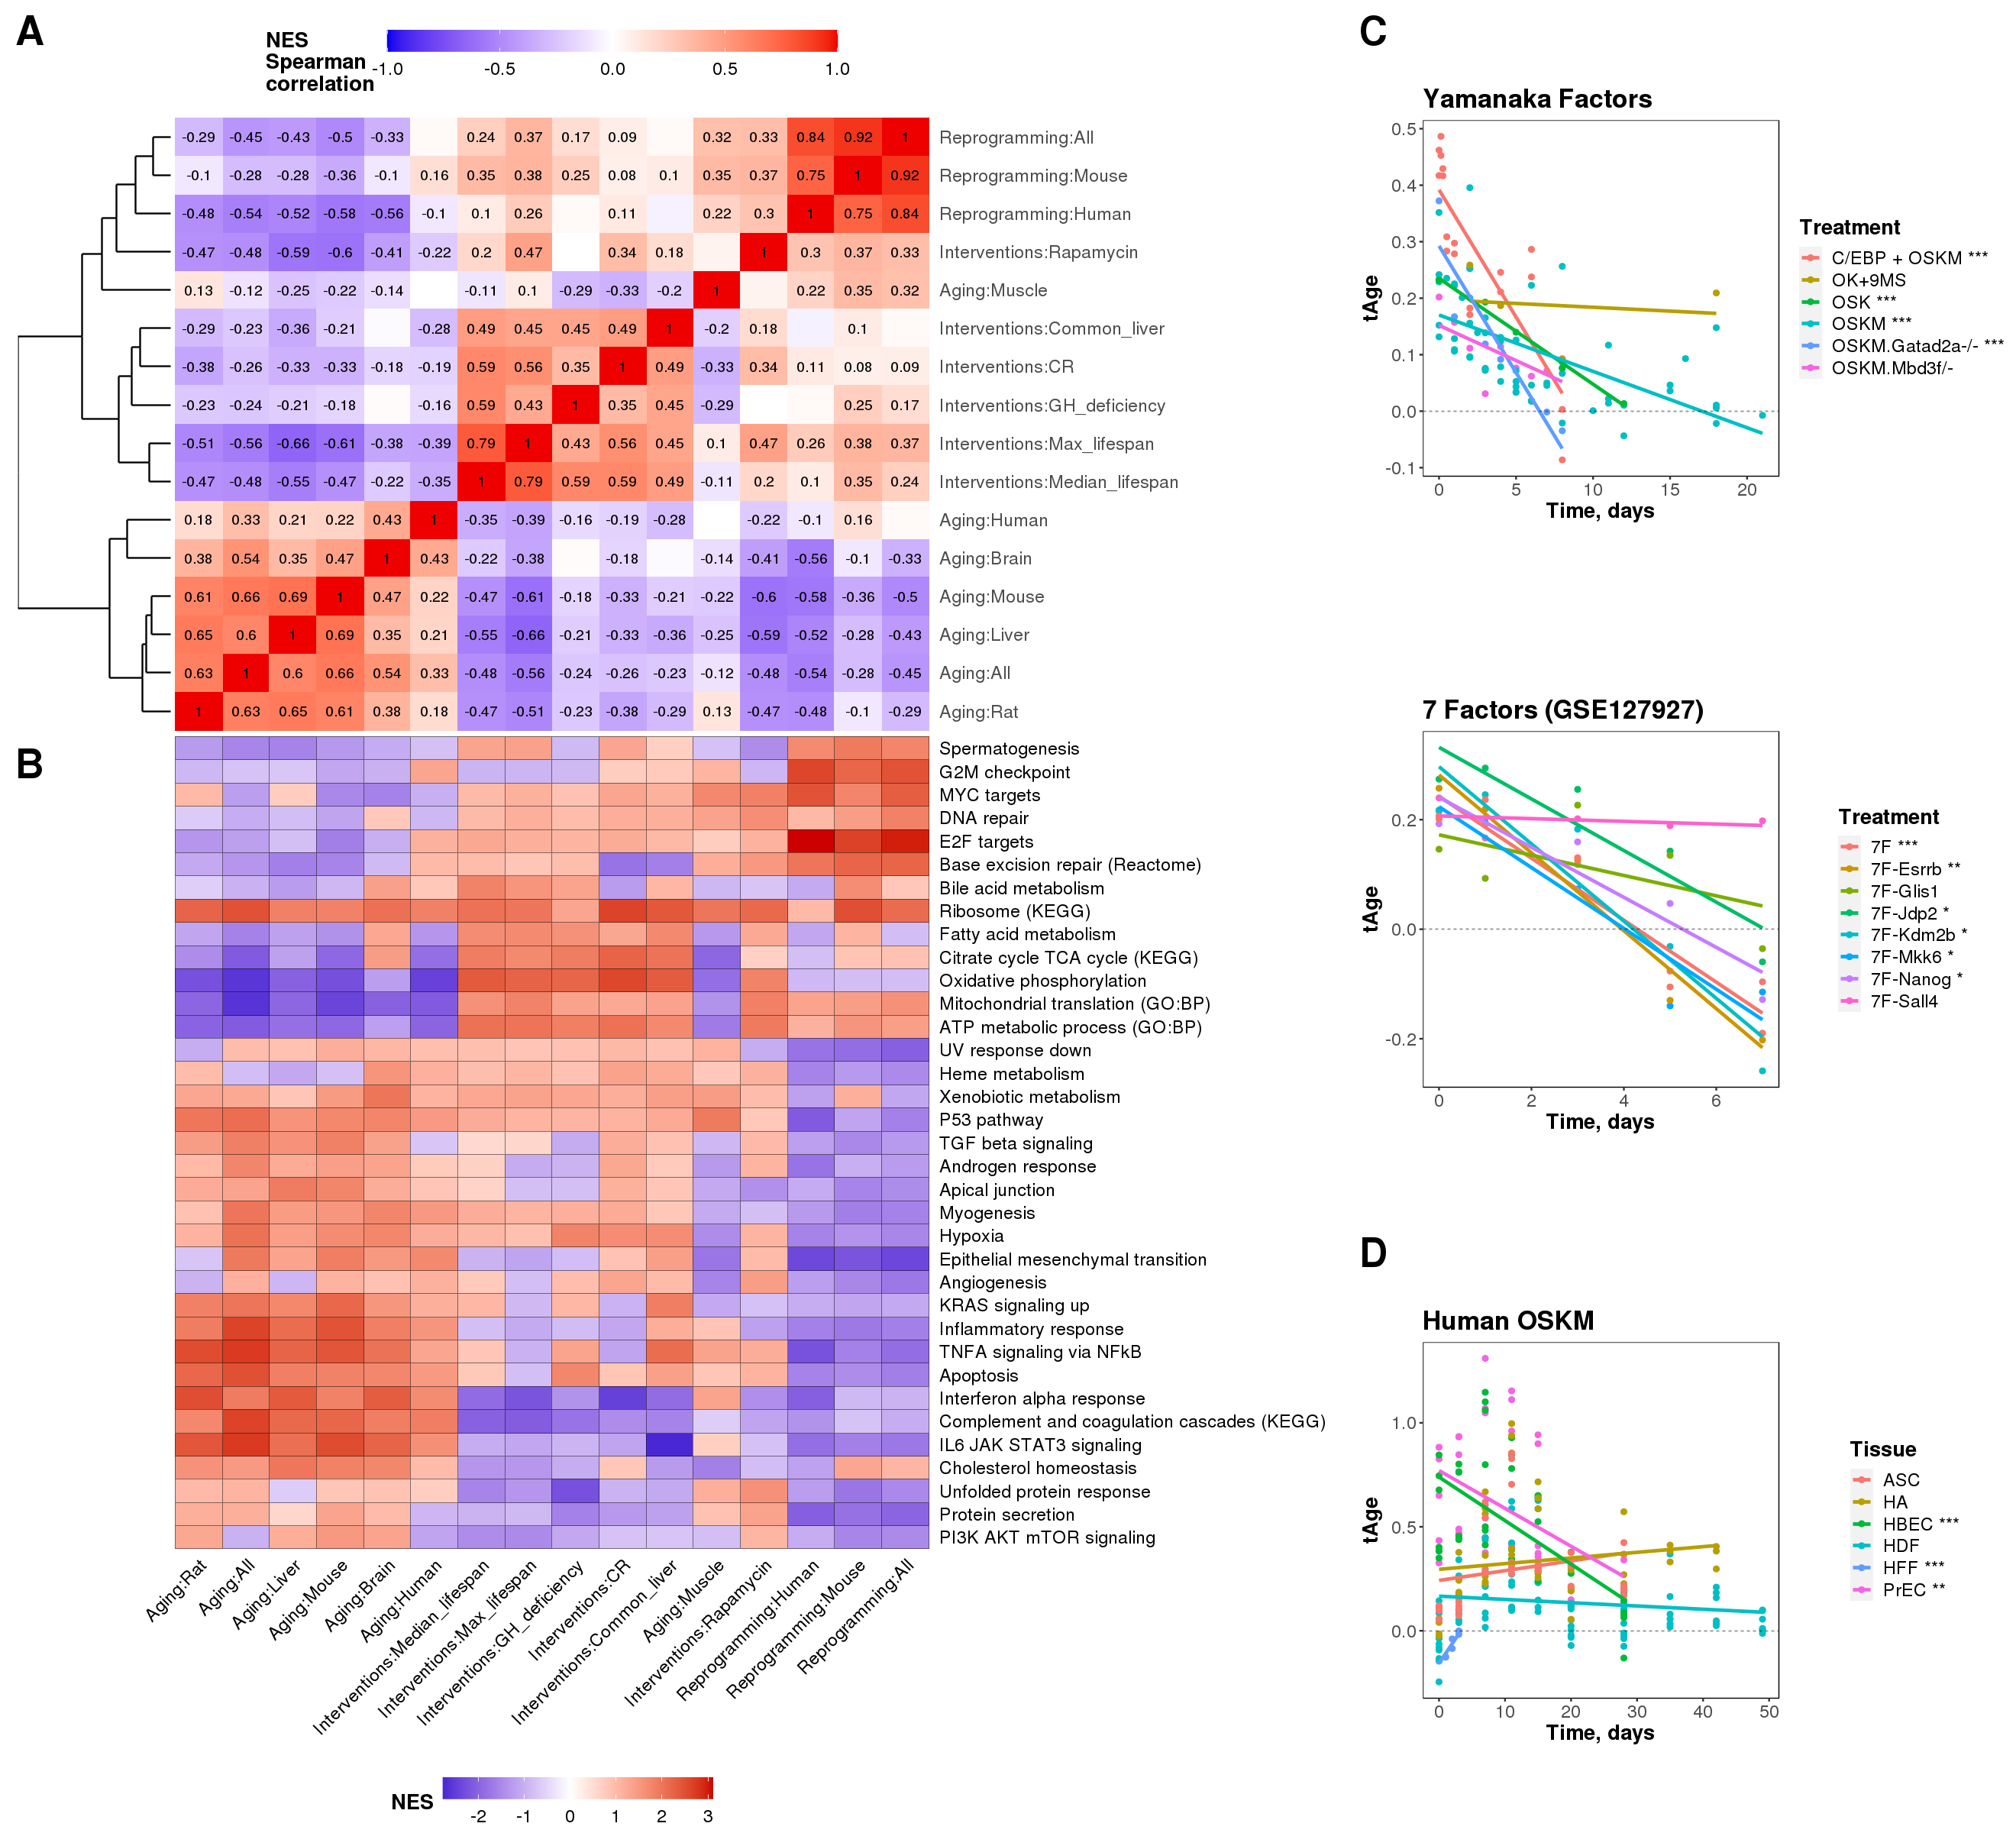

In [62]:
#corplot + hallmark
source("./plot_functions/ggcorplot_hallmark.R")
source('plot_functions/plot_hallmark.R')
source('plot_functions/plot_all_clocks.R')
source('plot_functions/plot_group_clocks.R')

options(repr.plot.width = 22, repr.plot.height = 20)
tmpplot <- ggheatmap_hallmark(gsea, 
                type='pairwise_top', method='spearman', top=500, pvplot=F,
                label_size=1.2, value_size=0.8, title="Spearman correlation",
                measure="NES", criterion="padj",
                orderCol = T, orderRow = T, dendroLineSize = 0.5,
                scaleName = "value",
                distMethod = "euclidean", clustMethod = "complete", 
                scale_name="NES \nSpearman \ncorrelation ")

gA <- tmpplot[['A']]
gB <- tmpplot[['B']]
gC <- plot_group_clocks(clockm, clockh)

left <- cowplot::plot_grid(gA, gB, labels=c("A", "B"), label_size = 32, ncol=1, align='v', 
                           rel_heights = c(2, 3))

cowplot::plot_grid(left, gC, label_size = 32, ncol=2, rel_widths = c(2, 1))


In [66]:
'***'

[1] "***"

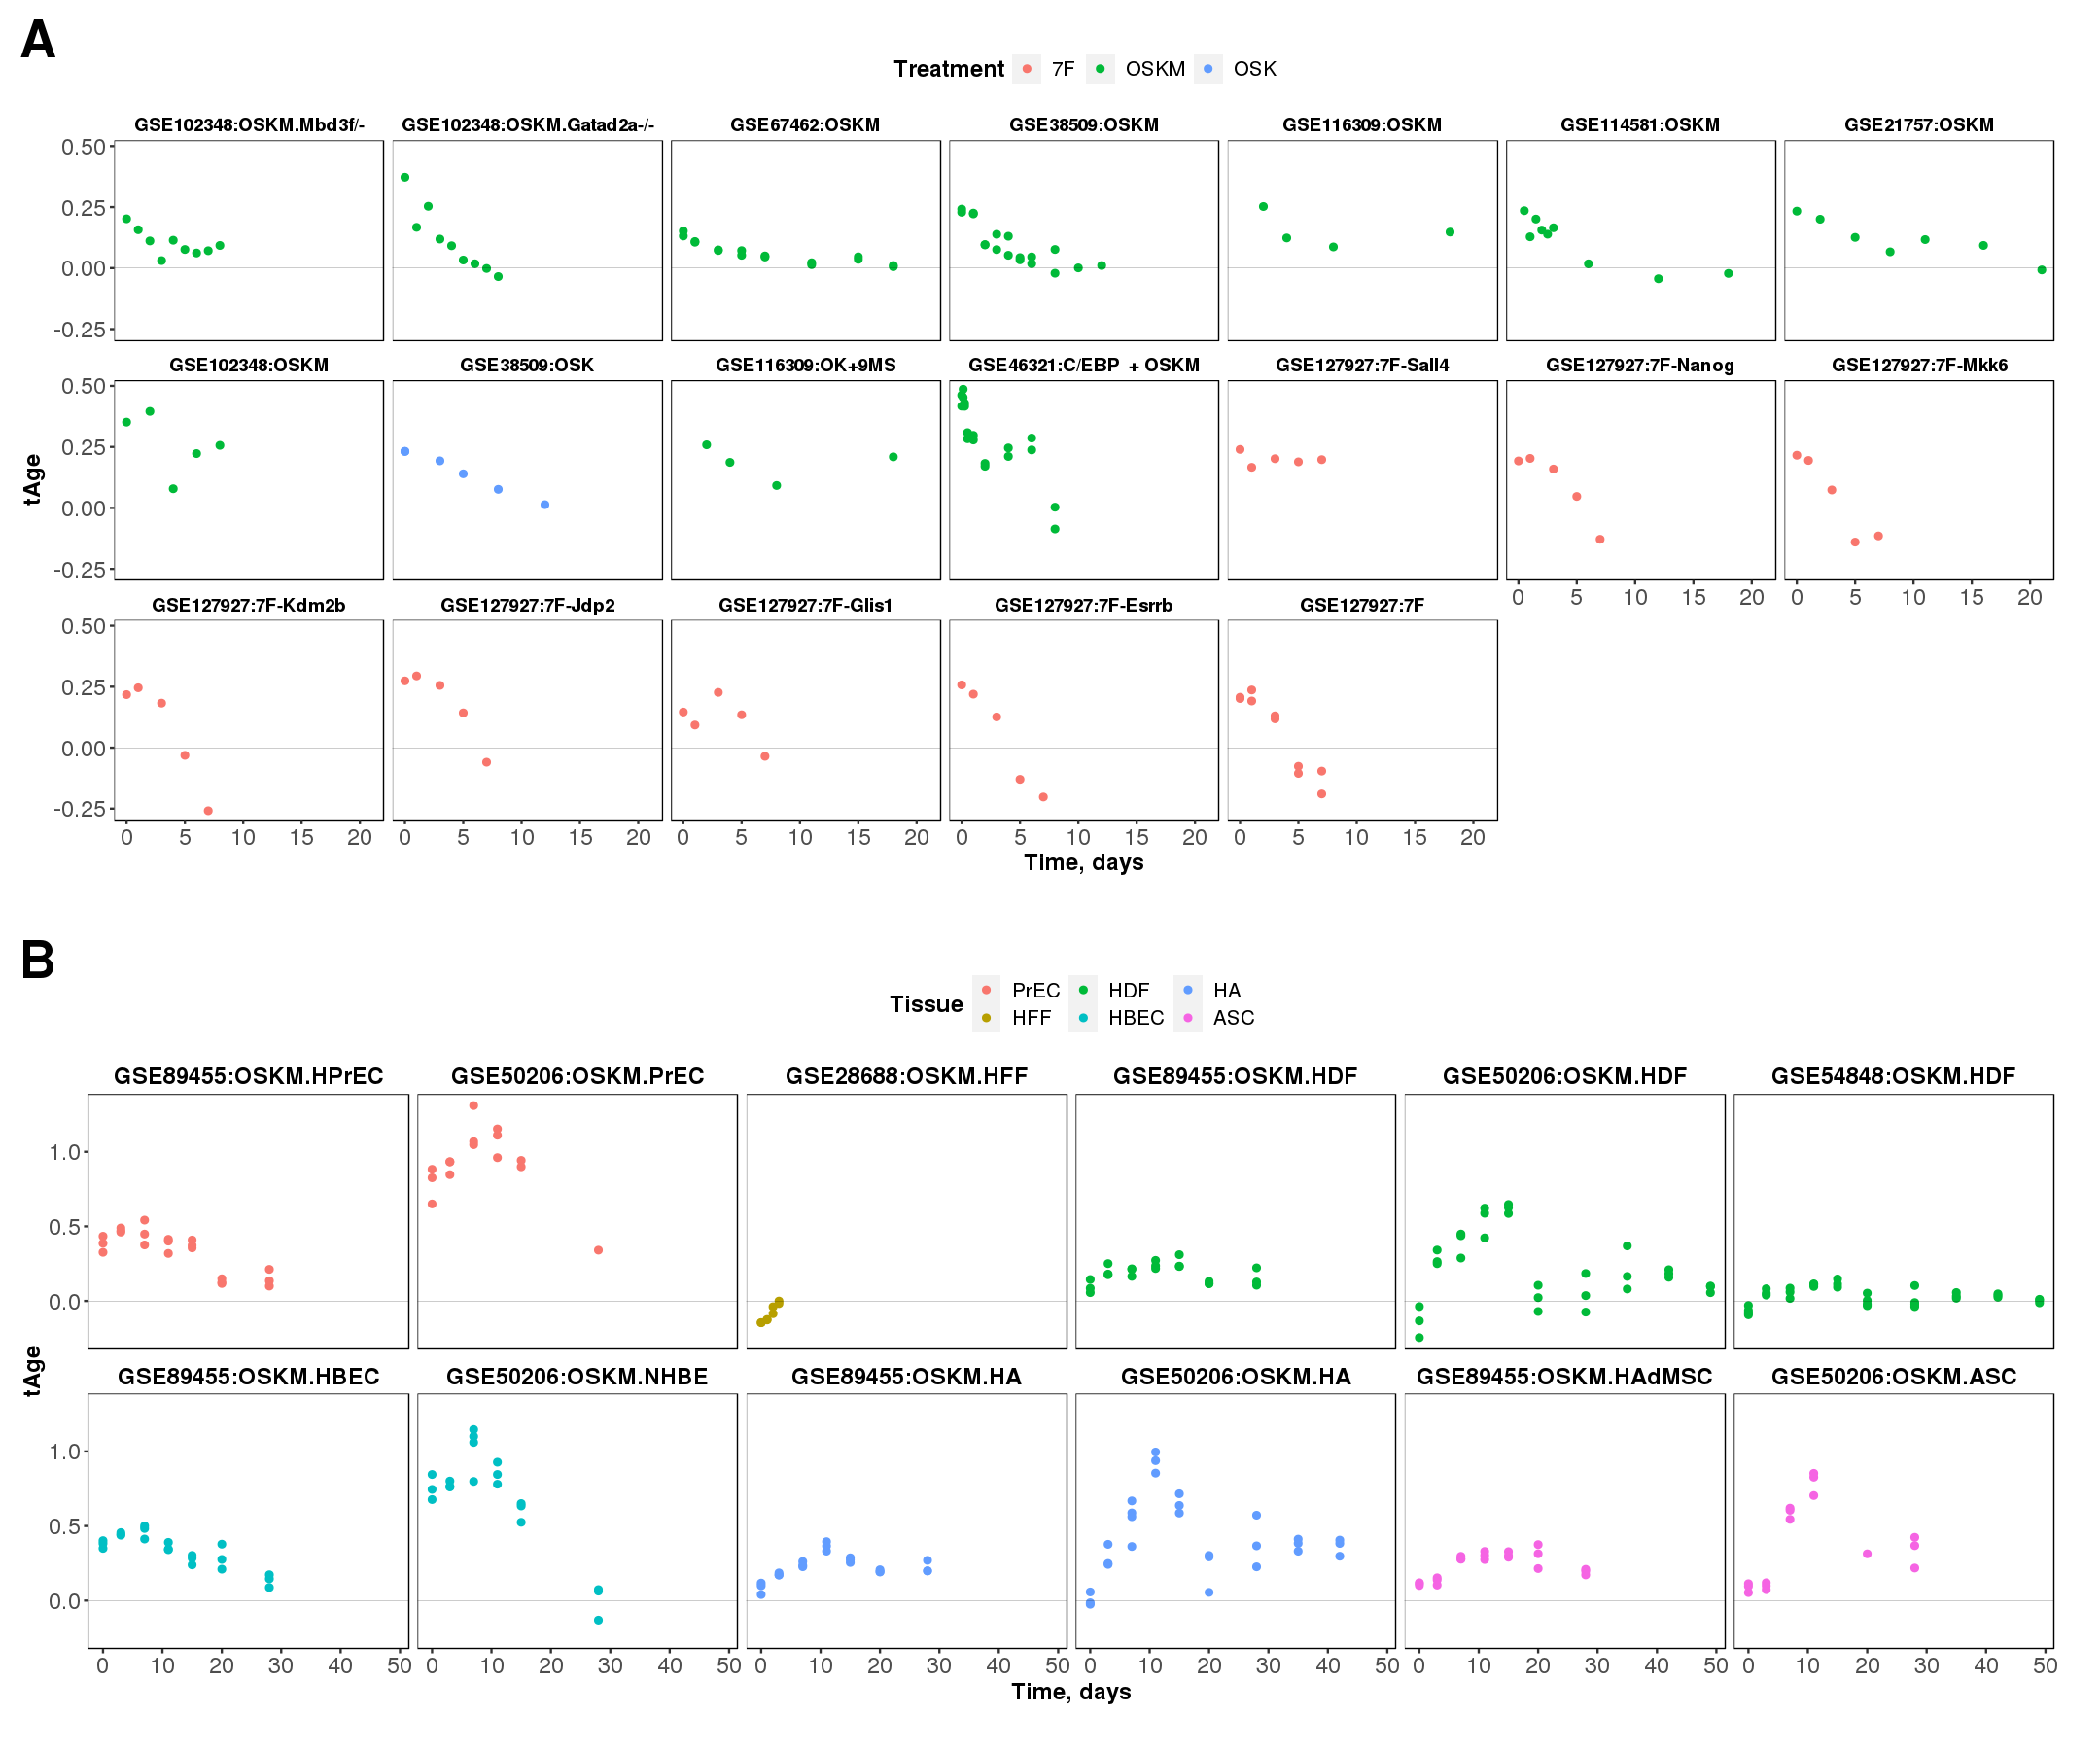

In [53]:
plot_all_clocks(clockm, clockh)

In [24]:
#read.csv('data/mouse_full_data_19ds.csv')

In [115]:
# selected_clock <- clock[!(clock$ID %in% c('GSE127927:7F-Sall4', 
#                                           'GSE46321:C/EBPα+ OSKM',
#                                           'GSE116309:OSKM',
#                                           'GSE116309:OK+9MS')), ]
# selected_clock <- clock

In [182]:
###boxplots
# options(repr.plot.width = 10, repr.plot.height = 7)
# ggplot(data=selected_clock, aes(x=factor(Pseudotime), y=tAge_norm_mouseClock)) + 
#         geom_boxplot(alpha = 0.80, outlier.shape = NA, fill='lightyellow') +
#         geom_hline(yintercept=0, linetype="solid", color = "black", size=0.4, alpha=0.4)+
#         geom_point(aes(fill = 'black'), size = 1, shape = 21, position = position_jitterdodge()) + 
#         theme(  axis.text=element_text(size=14),
#             axis.title=element_text(size=16, face="bold"),
#             panel.background = element_rect(fill='white', colour='black', size=0.3, linetype='solid'),
#             panel.grid.major = element_blank(),
#             panel.grid.minor = element_blank(),
#             legend.position = "none",
#             plot.margin = unit(c(1,1,1,0.5), "cm")) +
#             labs(x = "Time, days", y = "tAge")

# Panel 4

In [23]:
# gA <- cowplot::ggdraw() + cowplot::draw_image("figs/panel1/Mouse average dynamics_cluster_heatmap.svg", scale = 1)
# gB <- cowplot::ggdraw() + cowplot::draw_image("figs/panel1/Mouse average dynamics_cluster_dynamics.svg", scale = 1)
# p2 <- cowplot::ggdraw() + cowplot::draw_image("http://jeroen.github.io/images/tiger.svg", scale = 0.9)
# cowplot::plot_grid(gA, gB, p2, labels = "AUTO")

# Panel 5

# Garbage collector

In [30]:
# SL <- list()
# cols <- c('NES', 'pval', 'padj')
# types <- c(rep('Reprogramming',3), rep('Interventions',6), rep('Aging', 7))

# for (col in cols){
#     SL[[col]] <- data.frame(row.names=rownames(gsea[[1]]))
#     for (name in names(gsea)){
#             tmp <- gsea[[name]][col]
#             colnames(tmp) <- c(name)
#             SL[[col]] <- transform(merge(SL[[col]], tmp, 
#                                                 by=0, sort=F,), 
#                                                 row.names=Row.names, Row.names=NULL)
#     }
# }

# tmpdf <- gsea[[1]]

In [73]:
#asub <- SL[['pval']][, types=='Aging']
#as.vector(apply(asub, 1, gmean)

In [110]:
# # top <- 5
# gmean <- function(x) exp(mean(log(x)))
# # gm = as.data.frame(list('gmean'=apply(SL[['P.Value']], 1, gmean )))
# # gm <- rownames(gm[order(gm$gmean),, drop=FALSE])[1:top]

# #gmean
# asub <- SL[['padj']][, types=='Aging']
# GM <- as.vector(apply(asub, 1, gmean))
# asub <- (GM < 0.05)

# isub <- SL[['padj']][, types=='Interventions']
# GM <- as.vector(apply(isub, 1, gmean))
# isub <- (GM < 0.05)

# rsub <- SL[['padj']][, types=='Reprogramming']
# GM <- as.vector(apply(rsub, 1, gmean))
# rsub <- (GM < 0.05)

# #mean
# amub <- SL[['NES']][, types=='Aging']
# GM <- as.vector(apply(amub, 1, mean))
# amub <- (GM > 0.)

# imub <- SL[['NES']][, types=='Interventions']
# GM <- as.vector(apply(imub, 1, mean))
# imub <- (GM < 0.)

# rmub <- SL[['NES']][, types=='Reprogramming']
# GM <- as.vector(apply(rmub, 1, mean))
# rmub <- (GM < 0.)

# direction_cond <- asub & rsub & amub & imub & rmub


# cond <- SL[['padj']][direction_cond,]
# cond_filt <- cond[order(cond$Reprogramming.Mouse),]
# accepted <- rownames(cond_filt)
# length(accepted)

[1] 69

In [113]:
# #func_interest <- accepted[1:6]
# func_interest <- c('GOBP_ATP_METABOLIC_PROCESS', 
#                    'KEGG_RIBOSOME',
#                    'REACTOME_MITOCHONDRIAL_TRANSLATION')

In [43]:
# melter <- data.frame()
# for (f in func_interest){
#         #func for mapping stars
#         plab <- function(p )ifelse(p<0.001,'***', ifelse(p<0.01,'**', ifelse(p<0.05,'*',''))) 

#         #rescale columns
#         tmpLogFC <- SL[['NES']] #/ apply(SL[['NES']], 2, sd)

#         mel <- t(tmpLogFC[f,])
#         mel <- transform(merge(mel,  t(SL[['pval']][f,]), by=0, sort=F), 
#                                         row.names=Row.names, Row.names=NULL)
#         mel <- merge(mel,  t(SL[['padj']][f,]), by=0, sort=F)
#         mel$Function <- rep(f, nrow(mel))
#         colnames(mel) <- c('Signature', 'NES', 'Pval', 'Padj', 'Function')
#         mel$Type <- types
#         mel$Signature <- factor(as.character(mel$Signature), levels=unique(as.character(mel$Signature)))
#         mel$Star <- plab(mel$Padj)
#         mel$Vjust <- if_else(mel$NES > 0, 0.2, 1.1)
#         # mel$Symbol <- rep(sym, nrow(mel))
#         melter <- rbind(melter, mel)
# }

# #plot
# options(repr.plot.width = 10, repr.plot.height = 16)
# g <- ggplot(melter, aes(x=Signature, y=NES, fill=Type))+ 
#         geom_bar(stat="identity") +
#         facet_wrap(~Function, ncol=1, scales = "free_y", dir="v") + 
#         geom_text(aes(label=Star, vjust=melter$Vjust, hjust=0.5), fontface='bold', size=7)+
#         #geom_errorbar(aes(ymin=Coef-SE, ymax=Coef+SE), width=0.18) + 
#         theme(axis.text=element_text(size=14, angle=45, hjust=1),
#                 strip.background = element_blank(),
#                 strip.placement = 'inside',
#                 strip.text = element_text(colour = 'black', size=16, face="bold", hjust = 0.5),     
#                 axis.title=element_text(size=18, face="bold"), 
#                 plot.title=element_text(size = 20, face = "bold"),
#                 legend.title=element_text(size=16, face = "bold"),
#                 legend.text=element_text(size=14),
#                 legend.position="top",
#                 panel.background = element_rect(fill='white', colour='black', size=1.1, linetype='solid'),
#                 panel.grid.major = element_blank(),
#                 panel.grid.minor = element_blank(),
#                 plot.margin = unit(c(0.5,0.5,0.5,0.), "cm")) +
#                 labs(x = "", y = "NES")+
#                 expand_limits(y=c(-3, 3))
# g
